# Linear Regression and Correlation

## Challenge 1

You are the owner of a big company and you suspect that the younger your employees are, the most likely it is that they don't come to work. In order to prove this hypothesis, you have gathered some data:

| EmployeeID | Age | Absences |
|--------|-----|------------|
| 1      | 27  | 15         |
| 2      | 61  | 6          |
| 3      | 37  | 10         |
| 4      | 23  | 18         |
| 5      | 46  |  9         |
| 6      | 58  |  7         |
| 7      | 29  | 14         |
| 8      | 36  | 11         |
| 9      | 64  |  5         |
| 10     | 40  |  8         |

You can find this information in the `data` folder of the present repository. 

Import the necessary libraries to complete the lab here:

In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

#### 1. Plot the scatter chart of `Age` and `Absences`. Comment the result. Do you see any relation between `Age` and `Absences`?

In [2]:
df = pd.read_csv('absences.csv')
df.dtypes

Unnamed: 0    int64
EmployeeID    int64
Age           int64
Absences      int64
dtype: object

Text(0.5, 1.0, 'No of abcences per person')

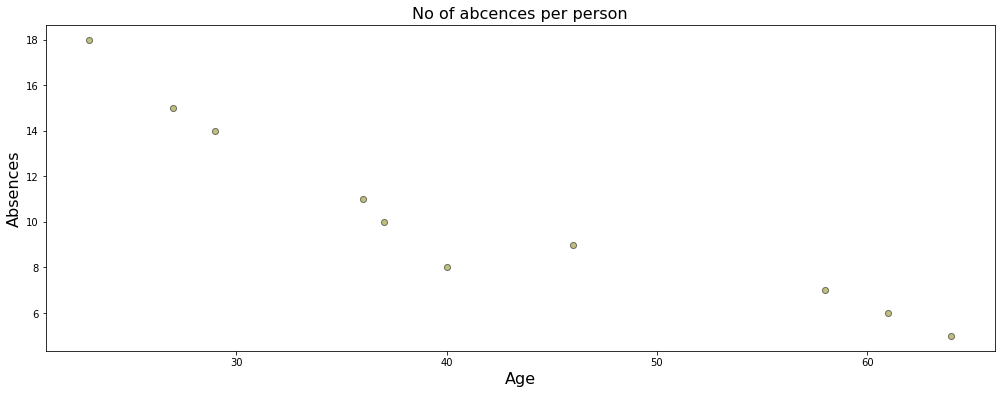

In [3]:
plt.figure(figsize=(17,6))
x = df.Age
y = df.Absences
plt.scatter(x,y, label='No of abcences', s=150,
           color='olive', edgecolor='black', alpha=0.5, marker='.')
plt.xlabel('Age', fontsize=16)
plt.ylabel('Absences', fontsize=16)
plt.title('No of abcences per person', fontsize=16)



In [4]:
# we can already see from this scatter plot that there's probably a 
#negative correlation between Age and Absences. Meaning that the older
#you are, the less likely you are to be absent

#### 2.- Define a function to calculate the slope and intercept of the regression line for two variables. Your are not allowed to use any functions or methods that directly calculate those parameters.

In [43]:
def slope_intercept(x, y):
    distance_xy = sum(y*x) - (len(x)*(sum(x)/len(x))*(sum(y)/len(y)))
    distance_xx = sum(x*x) - (len(x)*(sum(x)/len(x))*(sum(x)/len(x)))
  
    slope = distance_xy / distance_xx
    intercept = (sum(y)/len(y)) - slope*(sum(x)/len(x))
    
    return print('slope', slope,'intercept', intercept)

slope_intercept(df['Age'],df['Absences'])

slope -0.26810883370334077 intercept 21.58738189891065


#### 3.- Use the function you defined in step 2 to calculate the regression line for `Age` and `Absences`. Plot it and comment your results.

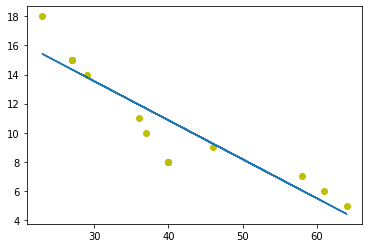

In [44]:
x = df['Age']
y = df['Absences']

plt.scatter([x1,x2],[y1,y2])
coef = np.polyfit(x, y, 1)
poly1d_fn = np.poly1d(coef) 

plt.plot(x,y, 'yo', x, poly1d_fn(x),)

With this linear regression, now we are sure that there is a negative correlation betweeen age and absences. The older you get the less likely you are to miss work.


#### 4.- Define a function to calculate the covariance and the correlation of two variables.

In [45]:
def mean(x):
    return sum(x) / len(x)

In [47]:
def cov(x, y):
    x_mean = mean(x)
    y_mean = mean(y)
    data = [(x[i] - x_mean) * (y[i] - y_mean)
            for i in range(len(x))]
    return sum(data) / (len(data) - 1)
def corr(x, y):
    std1 = x.std()
    std2 = y.std()
    corr = (cov(x,y)/(std1*std2))
    return corr

#### 5.- Use the function you defined in step 4 to calculate the covariance and the correlation of `Age` and `Absences`. Compare them and comment.

In [48]:

print('cov', cov(df['Age'],df['Absences']))
print('corr', corr(df['Age'],df['Absences']))

cov -57.699999999999996
corr -0.9325434092481012


We can see the covariance is negative and pretty high so it confirms that, as we grow we are less absent indeed.
and with the correlation coefficient (the normalized version of the covariance) we see the relationship is colse to a perfect negative correlation (-1) so it must be a pretty strong retalionship.

#### 6.- Summarize your results, interpret them and give some insights. Can you confirm that the age is an indicator of absenteeism?

To sum up, yes, age is an indicator of absenteeism because the relationship between age and absences is srong enough to conclude that. the older you get the less likely you are to skip a day.

## Challenge 2

Good Ironhackers stay in campus on Fridays for Ironbeers. You suspect that the more people you tell to stay, the most likely it is that they don't. You want to know if you are the reason why people don't stay so you decide to do an analysis. 

X is the number of people that you told to stay and Y is the number of people that actually stayed.

| X | Y |
|---|---|
| 1 | 1 |
| 3 | 2 |
| 4 | 4 |
| 6 | 4 |
| 8 | 5 |
| 9 | 7 |
| 11 |8 |
| 14 | 9 |

Use the following command to create a dataframe with the data about Ironbeers attendance:

In [49]:
ironbeers_df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,9]})

#### 1.- Calculate the covariance and the correlation of `X` and `Y`. Comment on the results.

In [50]:
print('Covariance',cov(ironbeers_df['X'],ironbeers_df['Y']))
print('Correlation',corr(ironbeers_df['X'],ironbeers_df['Y']))

Covariance 12.0
Correlation 0.9770084209183943


from the high positive correlation we can see that the case is actually the opposite of what we thought, proably the more people you tell, the more likely is they will stay.

#### 2.- Plot the scatter chart of `X` and `Y`. Comment on the results.

Text(0, 0.5, 'No of people who actually stayed for beers')

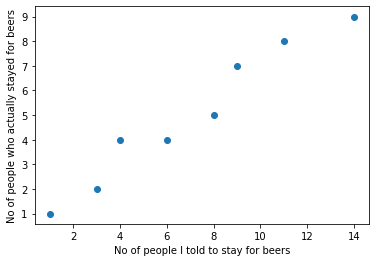

In [51]:
plt.scatter(ironbeers_df['X'],ironbeers_df['Y'])
plt.xlabel('No of people I told to stay for beers')
plt.ylabel('No of people who actually stayed for beers')

As we saw with the correlation and covariance, the more people you tell, the more people that comes.

#### 3.- Calculate the regression line for `X` and `Y`. Commment on the results.

Text(0, 0.5, 'No of people who actually stayed for beers')

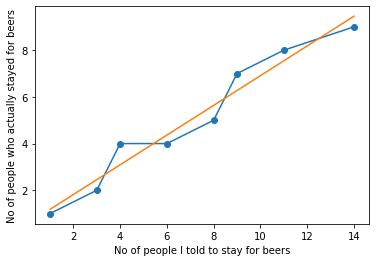

In [53]:
x = ironbeers_df['X']
y = ironbeers_df['Y']

plt.scatter(x, y)
coef = np.polyfit(x, y, 1)
poly1d_fn = np.poly1d(coef) 

plt.plot(x,y, x, poly1d_fn(x))
plt.xlabel('No of people I told to stay for beers')
plt.ylabel('No of people who actually stayed for beers')

The positive slope of the regression confirms once more, that the more people yo tel the more people that comes.

#### 4.- What is your conclusion? Are you the reason why people is not staying on Fridays?

No, at least not entierly, because if you tell people they come, so in other words, it's your fault if you don't tell anyone, because your're born a leader!

## Bonus Challenge: Error Analysis

You are going to do an analysis to check whether two random variables fit into a linear regression or not.

In this challenge, you are asked to do an error analysis using the data in **challenge 2**. An "error" is the difference between the expected value of an observation (the regression line value) and the actual value.

#### 1.- First create a new column `expected_Y` in `ironbeers_df` to store the expected `Y` value for each `X`.
**Hint**: You get the expected `Y` by evaluating the regression line for each `X`.

In [21]:
# your code here

#### 2.- Create a new column `error` in `ironbeers_df` to store the error between the actual and expected values of `Y`. Plot the scatter chart of `X` and `error`.

In [22]:
# your code here

#### 3.- The closer the points to zero, the best the actual values fit the linear regression. Comment the plot above. Do you see any particular points with a high error?

In [23]:
# your comments here

#### 4.- Remove the points with a high error and recalculate the regression line.

In [24]:
# your code here

#### 5.- Calculate the correlation. What is happening? Comment the result.

In [25]:
# your code here

In [26]:
# your comments here